In [131]:
from scipy.io import loadmat
import numpy as np
%matplotlib inline
from sklearn.metrics import confusion_matrix
import itertools
import matplotlib.pyplot as plt

Indian pines

In [132]:
ipx = loadmat('/content/drive/MyDrive/Indian_pines_corrected.mat')['indian_pines_corrected']
ipy = loadmat('/content/drive/MyDrive/Indian_pines_gt.mat')['indian_pines_gt']
ipx.shape,ipy.shape

((145, 145, 200), (145, 145))

Pavia


In [133]:
px = loadmat('/content/drive/MyDrive/Pavia.mat')['pavia']
py = loadmat('/content/drive/MyDrive/Pavia_gt.mat')['pavia_gt']
px.shape,py.shape

((1096, 715, 102), (1096, 715))

Target

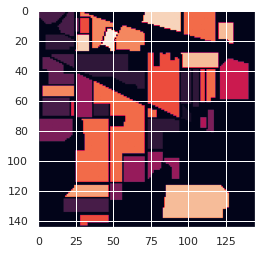

In [134]:
import matplotlib.pyplot as plt
plt.imshow(ipy)

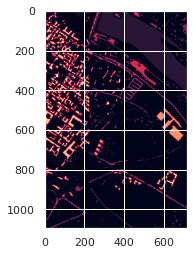

In [135]:
plt.imshow(py)

**INDIAN PINES**



Preprocessing

In [136]:
uniques, ids = np.unique(ipy, return_inverse=True)
len(uniques)

17

In [137]:
ipx = ipx.reshape(145*145,200,1)
ipy = ipy.reshape(145*145)
ipx.shape,ipy.shape

((21025, 200, 1), (21025,))

In [138]:
ipy = to_categorical(ids, len(uniques))
ipy.shape

(21025, 17)

Model

In [139]:
from keras.models import Sequential
from keras.layers import Conv1D, MaxPooling1D
from keras.layers import Activation, Dropout, Flatten, Dense

In [140]:
model = Sequential()
model.add(Conv1D(16, kernel_size=3, activation='relu', input_shape=(200,1)))
model.add(MaxPooling1D(pool_size=2))
model.add(Conv1D(32, kernel_size=3, activation='relu', input_shape=(99,16)))
model.add(MaxPooling1D(pool_size=2))
model.add(Conv1D(64, kernel_size=3, activation='relu', input_shape=(48,32)))
model.add(MaxPooling1D(pool_size=2))
model.add(Flatten())
model.add(Dense(100, activation='relu'))
model.add(Dense(17, activation='softmax'))
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_13 (Conv1D)           (None, 198, 16)           64        
_________________________________________________________________
max_pooling1d_13 (MaxPooling (None, 99, 16)            0         
_________________________________________________________________
conv1d_14 (Conv1D)           (None, 97, 32)            1568      
_________________________________________________________________
max_pooling1d_14 (MaxPooling (None, 48, 32)            0         
_________________________________________________________________
conv1d_15 (Conv1D)           (None, 46, 64)            6208      
_________________________________________________________________
max_pooling1d_15 (MaxPooling (None, 23, 64)            0         
_________________________________________________________________
flatten_5 (Flatten)          (None, 1472)             

Training and comipiling - indian pines

In [141]:
#spliting the dataset
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(ipx.reshape(-1,200,1), ipy, test_size=0.20)
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((16820, 200, 1), (16820, 17), (4205, 200, 1), (4205, 17))

In [142]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=5, batch_size= 5)

Epoch 1/5
3364/3364 [==============================] - 16s 5ms/step - loss: 2.9632 - accuracy: 0.5409 - val_loss: 1.3151 - val_accuracy: 0.5489
Epoch 2/5
3364/3364 [==============================] - 16s 5ms/step - loss: 1.2583 - accuracy: 0.5762 - val_loss: 1.2370 - val_accuracy: 0.5824
Epoch 3/5
3364/3364 [==============================] - 16s 5ms/step - loss: 1.1682 - accuracy: 0.5918 - val_loss: 1.2556 - val_accuracy: 0.5902
Epoch 4/5
3364/3364 [==============================] - 15s 4ms/step - loss: 1.1411 - accuracy: 0.5966 - val_loss: 1.2176 - val_accuracy: 0.5841
Epoch 5/5
3364/3364 [==============================] - 15s 5ms/step - loss: 1.1165 - accuracy: 0.6034 - val_loss: 1.1276 - val_accuracy: 0.6038


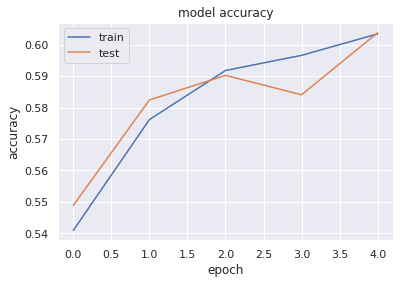

In [143]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

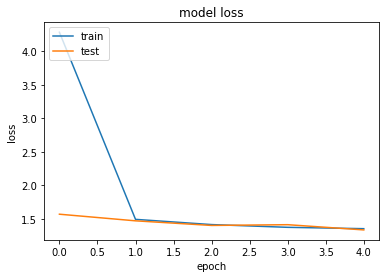

In [69]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [144]:
y_pred = model.predict(X_test)
y_pred = uniques[y_pred.argmax(1)]
y_test = uniques[y_test.argmax(1)]
y_pred.shape,y_test.shape

((4205,), (4205,))

In [145]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,y_pred)

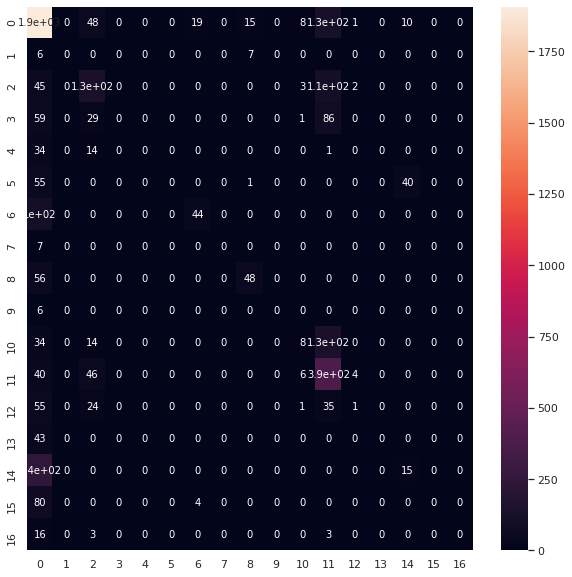

In [146]:
import seaborn as sn
import pandas as pd
df_cm = pd.DataFrame(cm, range(17), range(17))
plt.figure(figsize = (10,10))
sn.heatmap(df_cm, annot=True)

**PAVIA**

In [147]:
px.shape,py.shape

((1096, 715, 102), (1096, 715))

In [148]:
px = px.reshape(1096*715,102,1)
py = py.reshape(1096*715)
px.shape,py.shape,py[:10]

((783640, 102, 1),
 (783640,),
 array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=uint8))

In [149]:
uniques, ids = np.unique(py, return_inverse=True)
len(uniques)

10

In [150]:
py = to_categorical(ids, len(uniques))
py.shape

(783640, 10)

Model

In [151]:
model = Sequential()
model.add(Conv1D(16, kernel_size=3, activation='relu', input_shape=(102,1)))
model.add(MaxPooling1D(pool_size=2))
model.add(Conv1D(32, kernel_size=3, activation='relu', input_shape=(50,16)))
model.add(MaxPooling1D(pool_size=2))
model.add(Flatten())
model.add(Dense(100, activation='relu'))
model.add(Dense(10, activation='softmax'))

In [152]:
model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_16 (Conv1D)           (None, 100, 16)           64        
_________________________________________________________________
max_pooling1d_16 (MaxPooling (None, 50, 16)            0         
_________________________________________________________________
conv1d_17 (Conv1D)           (None, 48, 32)            1568      
_________________________________________________________________
max_pooling1d_17 (MaxPooling (None, 24, 32)            0         
_________________________________________________________________
flatten_6 (Flatten)          (None, 768)               0         
_________________________________________________________________
dense_12 (Dense)             (None, 100)               76900     
_________________________________________________________________
dense_13 (Dense)             (None, 10)               

In [153]:
#spliting the dataset
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(px, py, test_size=0.30)
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((548548, 102, 1), (548548, 10), (235092, 102, 1), (235092, 10))

In [154]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=5)

Epoch 1/5
17143/17143 [==============================] - 113s 7ms/step - loss: 0.5267 - accuracy: 0.8724 - val_loss: 0.3499 - val_accuracy: 0.8782
Epoch 2/5
17143/17143 [==============================] - 111s 6ms/step - loss: 0.3096 - accuracy: 0.8823 - val_loss: 0.3151 - val_accuracy: 0.8802
Epoch 3/5
17143/17143 [==============================] - 114s 7ms/step - loss: 0.2902 - accuracy: 0.8853 - val_loss: 0.2824 - val_accuracy: 0.8878
Epoch 4/5
17143/17143 [==============================] - 115s 7ms/step - loss: 0.2822 - accuracy: 0.8867 - val_loss: 0.2820 - val_accuracy: 0.8867
Epoch 5/5
17143/17143 [==============================] - 111s 7ms/step - loss: 0.2782 - accuracy: 0.8879 - val_loss: 0.2766 - val_accuracy: 0.8877


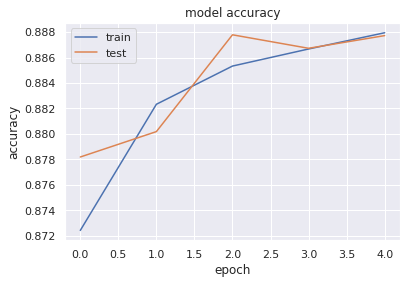

In [155]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

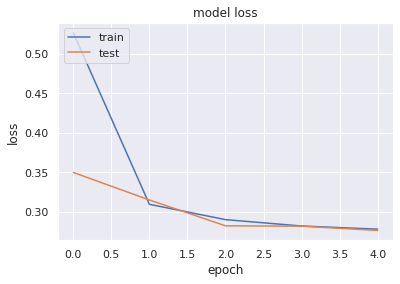

In [156]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [157]:
y_pred = model.predict(X_test)
y_pred = uniques[y_pred.argmax(1)]
y_test = uniques[y_test.argmax(1)]
y_pred.shape,y_test.shape

((235092,), (235092,))

In [158]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,y_pred)

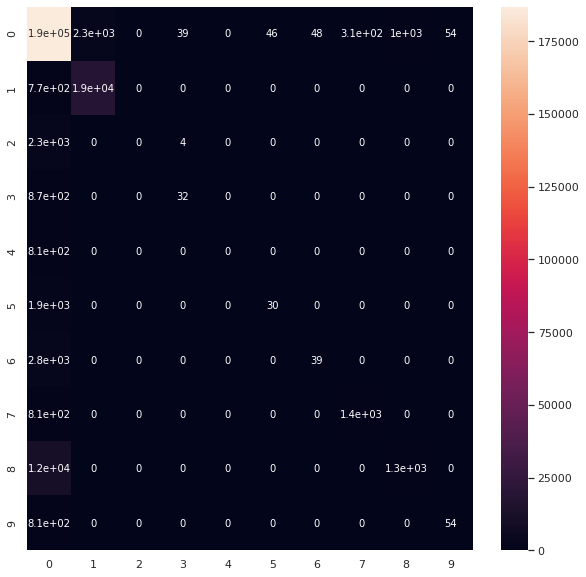

In [159]:
import seaborn as sn
import pandas as pd
df_cm = pd.DataFrame(cm, range(10), range(10))
plt.figure(figsize = (10,10))
sn.heatmap(df_cm, annot=True)

Dimension Reduction

In [160]:
px = px.reshape(-1,102)
px.shape,py.shape

((783640, 102), (783640, 10))

In [161]:
from sklearn.decomposition import PCA
pca = PCA(n_components=50)
pca.fit(px)
reduced_px = pca.transform(px)

In [165]:
reduced_px = reduced_px.reshape(-1,50,1) 

In [166]:
model = Sequential()
model.add(Conv1D(16, kernel_size=3, activation='relu', input_shape=(50,1)))
model.add(MaxPooling1D(pool_size=2))
model.add(Conv1D(32, kernel_size=3, activation='relu', input_shape=(24,16)))
model.add(MaxPooling1D(pool_size=2))
model.add(Flatten())
model.add(Dense(10, activation='softmax'))
model.summary()

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_20 (Conv1D)           (None, 48, 16)            64        
_________________________________________________________________
max_pooling1d_20 (MaxPooling (None, 24, 16)            0         
_________________________________________________________________
conv1d_21 (Conv1D)           (None, 22, 32)            1568      
_________________________________________________________________
max_pooling1d_21 (MaxPooling (None, 11, 32)            0         
_________________________________________________________________
flatten_8 (Flatten)          (None, 352)               0         
_________________________________________________________________
dense_15 (Dense)             (None, 10)                3530      
Total params: 5,162
Trainable params: 5,162
Non-trainable params: 0
____________________________________________________

In [167]:
#spliting the dataset
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(reduced_px, py, test_size=0.30)
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((548548, 50, 1), (548548, 10), (235092, 50, 1), (235092, 10))

In [168]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=5)

Epoch 1/5
17143/17143 [==============================] - 60s 4ms/step - loss: 0.7699 - accuracy: 0.8631 - val_loss: 0.3332 - val_accuracy: 0.8665
Epoch 2/5
17143/17143 [==============================] - 57s 3ms/step - loss: 0.3113 - accuracy: 0.8785 - val_loss: 0.3097 - val_accuracy: 0.8758
Epoch 3/5
17143/17143 [==============================] - 57s 3ms/step - loss: 0.3059 - accuracy: 0.8794 - val_loss: 0.2966 - val_accuracy: 0.8831
Epoch 4/5
17143/17143 [==============================] - 58s 3ms/step - loss: 0.3041 - accuracy: 0.8795 - val_loss: 0.3096 - val_accuracy: 0.8817
Epoch 5/5
17143/17143 [==============================] - 57s 3ms/step - loss: 0.3027 - accuracy: 0.8798 - val_loss: 0.3021 - val_accuracy: 0.8779


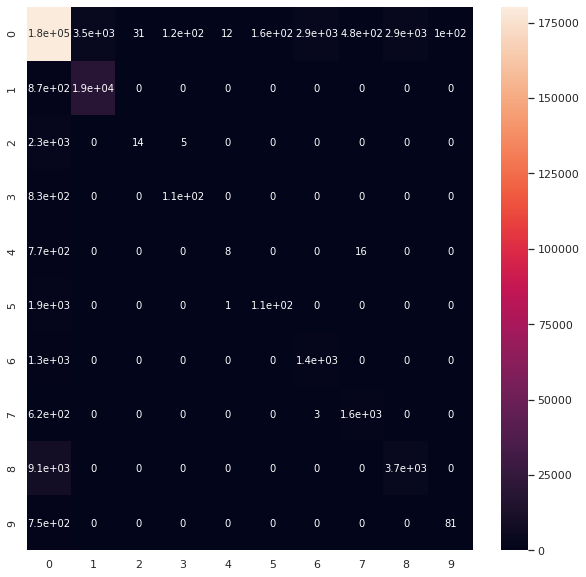

In [169]:
y_pred = model.predict(X_test)
y_pred = uniques[y_pred.argmax(1)]
y_test = uniques[y_test.argmax(1)]
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,y_pred)
import seaborn as sn
import pandas as pd
df_cm = pd.DataFrame(cm, range(10), range(10))
plt.figure(figsize = (10,10))
sn.heatmap(df_cm, annot=True)